# TV Shows and Movies listed on Netflix

### This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting  <a href = "https://flixable.com/netflix-museum/"> report </a> which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In [1]:
import pandas as pd
import numpy as np
import pandasql as ps
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix_data.shape

(7787, 12)

In [4]:
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### There are missing values in the following columns: director, cast, country, date_added and rating.
#### Since we cannot predict the added data, we can drop those rows that have missing values in this column

In [6]:
netflix_data.dropna(subset = ['date_added'], inplace = True)

In [7]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      5398 non-null   object
 4   cast          7059 non-null   object
 5   country       7271 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


#### As for director, cast, country, and rating columns, the word 'missing' should be inserted to substitute null values

In [8]:
netflix_data.director.fillna('missing', inplace = True)
netflix_data.cast.fillna('missing', inplace = True)
netflix_data.country.fillna('missing', inplace = True)
netflix_data.rating.fillna('missing', inplace = True)

In [9]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


<BarContainer object of 2 artists>

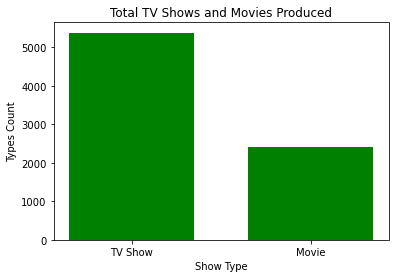

In [10]:
plt.title('Total TV Shows and Movies Produced')
plt.ylabel('Types Count')
plt.xlabel('Show Type')
plt.bar(netflix_data.type.unique(), netflix_data.type.value_counts(), width = 0.7, color = 'green')

### It is clearly seen that the number of TV Shows exceeds the number of Movies in more than 2 times

## Explore directors that made the most of the impactin the film industry

In [11]:
sorted_directors = netflix_data.director.value_counts()[1:20].sort_values(ascending = False)
sorted_directors

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Shannon Hartman            8
Kunle Afolayan             8
Quentin Tarantino          8
Lance Bangs                8
Hakan Algül                8
Ryan Polito                8
Robert Rodriguez           8
Johnnie To                 8
Ozan Açıktan               7
Don Michael Paul           7
Name: director, dtype: int64

Text(0.5, 0, 'Producer Name')

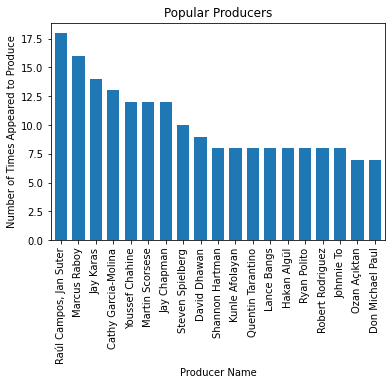

In [12]:
sorted_directors.plot(kind = 'bar', width = 0.7)
plt.title('Popular Producers')
plt.ylabel('Number of Times Appeared to Produce')
plt.xlabel('Producer Name')

### The most common director who made impact to the production of shows is Raúl Campos, Jan Suter

## Explore the Cast Members 

In [13]:
def split_people(names):
    people_list = list()
    people_list = names.split(',')
    return people_list

cast_actors = netflix_data.cast.apply(split_people)
cast_actors

0       [João Miguel,  Bianca Comparato,  Michel Gomes...
1       [Demián Bichir,  Héctor Bonilla,  Oscar Serran...
2       [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...
3       [Elijah Wood,  John C. Reilly,  Jennifer Conne...
4       [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...
                              ...                        
7782    [Imad Creidi,  Antoinette Turk,  Elias Gergi, ...
7783    [Vicky Kaushal,  Sarah-Jane Dias,  Raaghav Cha...
7784                                            [Nasty C]
7785                        [Adriano Zumbo,  Rachel Khoo]
7786                                            [missing]
Name: cast, Length: 7777, dtype: object

In [14]:
cast_dictionary = dict()

def create_cast_dict(name_list, dictionary):
    for name in name_list:
        if name not in dictionary:
            dictionary[name] = 1
        else:
            dictionary[name] += 1
    return dictionary

for actors in cast_actors:
    cast_dictionary = create_cast_dict(actors, cast_dictionary)
print(cast_dictionary)

{'João Miguel': 1, ' Bianca Comparato': 2, ' Michel Gomes': 1, ' Rodolfo Valente': 1, ' Vaneza Oliveira': 1, ' Rafael Lozano': 1, ' Viviane Porto': 1, ' Mel Fronckowiak': 1, ' Sergio Mamberti': 1, ' Zezé Motta': 1, ' Celso Frateschi': 1, 'Demián Bichir': 2, ' Héctor Bonilla': 1, ' Oscar Serrano': 1, ' Azalia Ortiz': 1, ' Octavio Michel': 1, ' Carmen Beato': 3, 'Tedd Chan': 1, ' Stella Chung': 1, ' Henley Hii': 5, ' Lawrence Koh': 1, ' Tommy Kuan': 1, ' Josh Lai': 1, ' Mark Lee': 2, ' Susan Leong': 2, ' Benjamin Lim': 1, 'Elijah Wood': 3, ' John C. Reilly': 9, ' Jennifer Connelly': 1, ' Christopher Plummer': 8, ' Crispin Glover': 6, ' Martin Landau': 4, ' Fred Tatasciore': 17, ' Alan Oppenheimer': 1, ' Tom Kane': 3, 'Jim Sturgess': 2, ' Kevin Spacey': 5, ' Kate Bosworth': 4, ' Aaron Yoo': 3, ' Liza Lapira': 3, ' Jacob Pitts': 1, ' Laurence Fishburne': 12, ' Jack McGee': 2, ' Josh Gad': 4, ' Sam Golzari': 1, ' Helen Carey': 2, ' Jack Gilpin': 1, 'Erdal Beşikçioğlu': 2, ' Yasemin Allen': 

In [15]:
print('Total number of unique roles where the cast actor and actresses took part:', sum(cast_dictionary.values()))
print('Number of unique actors acting in tv_shows:', len(cast_dictionary))

Total number of unique roles where the cast actor and actresses took part: 56604
Number of unique actors acting in tv_shows: 35339


In [16]:
top_cast = cast_dictionary
common_cast = Counter(top_cast)
show_cast_common = common_cast.most_common(100) 

common_cast_dict = dict()

for i in show_cast_common:
    common_cast_dict[i[0]] = i[1]

In [17]:
common_cast_dict

{'missing': 718,
 ' Anupam Kher': 38,
 ' Takahiro Sakurai': 28,
 ' Om Puri': 27,
 'Shah Rukh Khan': 27,
 ' Boman Irani': 25,
 ' Paresh Rawal': 24,
 ' Andrea Libman': 24,
 ' Yuki Kaji': 23,
 'Akshay Kumar': 22,
 ' Vincent Tong': 22,
 ' Kareena Kapoor': 20,
 ' John Cleese': 20,
 'Adam Sandler': 19,
 ' Gulshan Grover': 18,
 ' Naseeruddin Shah': 18,
 ' Ai Kayano': 18,
 'Amitabh Bachchan': 18,
 ' Yashpal Sharma': 18,
 'David Attenborough': 18,
 ' Junichi Suwabe': 18,
 ' Fred Tatasciore': 17,
 ' Kana Hanazawa': 17,
 ' Asrani': 17,
 ' Erin Fitzgerald': 16,
 ' Amrish Puri': 16,
 'Ajay Devgn': 16,
 ' Michael Palin': 16,
 ' Daisuke Ono': 16,
 ' Ashleigh Ball': 16,
 'Nicolas Cage': 16,
 ' Manoj Joshi': 16,
 ' Hassan Hosny': 16,
 ' Tomokazu Sugita': 16,
 ' Sean Astin': 15,
 ' Kay Kay Menon': 15,
 ' Tinnu Anand': 15,
 ' Pankaj Tripathi': 15,
 ' Tara Strong': 15,
 ' Vijay Raaz': 15,
 ' Rajesh Sharma': 15,
 ' Alessandro Juliani': 15,
 ' Eric Idle': 15,
 ' Diana Kaarina': 15,
 ' Danny Trejo': 14,
 ' J

In [18]:
common_cast_df = pd.DataFrame.from_dict(common_cast_dict, orient = 'index')

Text(0.5, 0, 'Actor/Actress Name')

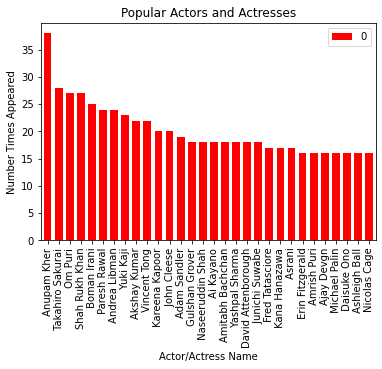

In [19]:
common_cast_df[1:31].plot(kind = 'bar', width = 0.7, color = 'red')
plt.title('Popular Actors and Actresses')
plt.ylabel('Number Times Appeared')
plt.xlabel('Actor/Actress Name')

### Anupam Kher is the most popular actor

## Explore the most popular country

In [20]:
common_country_list = []

for country in netflix_data.country:
    split_country = country.split(',')
    for new_country in split_country:
        common_country_list.append(new_country.strip())

In [21]:
common_country = {}
for country in common_country_list:
    common_country[country] = common_country_list.count(country)

In [22]:
common_country_counter = Counter(common_country)
show_common = common_country_counter.most_common(50)


common_country_dict = dict()

for i in show_common:
    common_country_dict[i[0]] = i[1]

In [23]:
common_country_dict

{'United States': 3291,
 'India': 990,
 'United Kingdom': 722,
 'missing': 506,
 'Canada': 412,
 'France': 349,
 'Japan': 286,
 'Spain': 215,
 'South Korea': 212,
 'Germany': 199,
 'Mexico': 154,
 'China': 147,
 'Australia': 143,
 'Egypt': 110,
 'Turkey': 108,
 'Hong Kong': 102,
 'Italy': 90,
 'Brazil': 88,
 'Taiwan': 85,
 'Belgium': 85,
 'Argentina': 82,
 'Indonesia': 80,
 'Philippines': 78,
 'Nigeria': 76,
 'Thailand': 65,
 'South Africa': 54,
 'Netherlands': 45,
 'Colombia': 45,
 'Denmark': 44,
 'Ireland': 40,
 'Singapore': 39,
 'Sweden': 39,
 'Poland': 36,
 'United Arab Emirates': 34,
 'Norway': 29,
 'New Zealand': 28,
 'Russia': 27,
 'Israel': 26,
 'Chile': 26,
 'Lebanon': 26,
 'Malaysia': 26,
 'Pakistan': 24,
 'Czech Republic': 20,
 'Switzerland': 17,
 'Uruguay': 14,
 'Romania': 12,
 'Luxembourg': 11,
 'Finland': 11,
 'Austria': 11,
 'Peru': 10}

In [24]:
common_country_df = pd.DataFrame.from_dict(common_country_dict, orient = 'index')

Text(0.5, 0, 'Country Name')

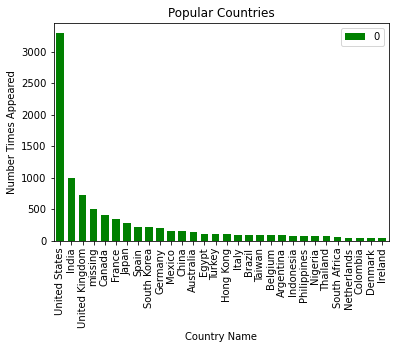

In [25]:
common_country_df[0:30].plot(kind = 'bar', width = 0.7, color = 'green')
plt.title('Popular Countries')
plt.ylabel('Number Times Appeared')
plt.xlabel('Country Name')

### Based on the results above, the most popular country is the United States

## Now indentify the number of Movies and TV Shows released per year

In [26]:
movies = pd.DataFrame(netflix_data.groupby('type')['release_year'].value_counts()['Movie'].sort_values(ascending = False)[:20])
tv_shows = pd.DataFrame(netflix_data.groupby('type')['release_year'].value_counts()['TV Show'].sort_values(ascending = False)[:20])

Text(0.5, 0, 'Year Number')

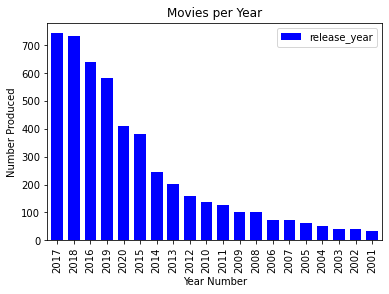

In [27]:
movies.plot(kind = 'bar', width = 0.7, color = 'blue')
plt.title('Movies per Year')
plt.ylabel('Number Produced')
plt.xlabel('Year Number')

Text(0.5, 0, 'Year Number')

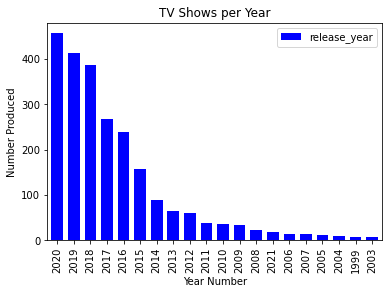

In [28]:
tv_shows.plot(kind = 'bar', width = 0.7, color = 'blue')
plt.title('TV Shows per Year')
plt.ylabel('Number Produced')
plt.xlabel('Year Number')

In [29]:
listed_in_list = []

for items in netflix_data.listed_in:
    split_item = items.split(',')
    for new_item in split_item:
        listed_in_list.append(new_item.strip())

In [30]:
listed_in_dict = dict()
for item in listed_in_list:
    listed_in_dict[item] = listed_in_list.count(item)

In [31]:
common_listed_in = Counter(listed_in_dict)
listed_in_common = common_listed_in.most_common(50)

common_listed_in_dict = dict()

for i in listed_in_common:
    common_listed_in_dict[i[0]] = i[1]

<BarContainer object of 42 artists>

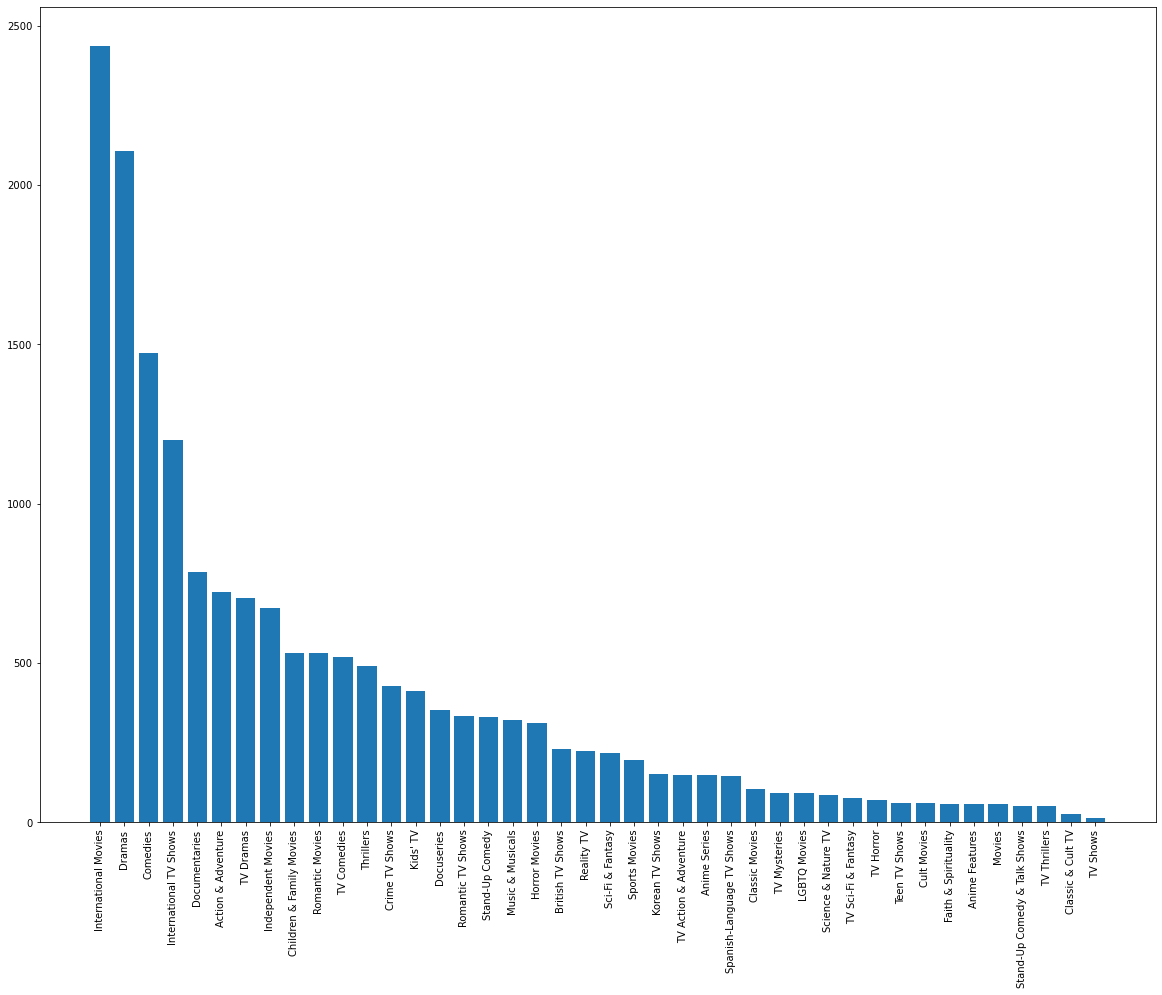

In [32]:
plt.figure(figsize = (20, 15))
plt.xticks(rotation = '90')
plt.bar(common_listed_in_dict.keys(), common_listed_in_dict.values())


### The most popular tag on Netflix is International Movies

## Analyze the duration of Movies and TV Shows

In [33]:
all_movies_sql = "SELECT * FROM netflix_data WHERE type = 'Movie'"
all_movies = ps.sqldf(all_movies_sql)
all_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
4,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5372,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
5373,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
5374,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
5375,s7785,Movie,Zulu Man in Japan,missing,Nasty C,missing,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

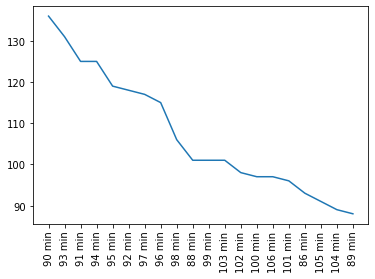

In [34]:
plt.plot(all_movies.duration.value_counts().index.to_list()[:20], all_movies.duration.value_counts()[:20])
plt.xticks(rotation = '90')

### Most of the Movies have duration of 90 minutes

In [35]:
all_tv_shows_sql = "SELECT * FROM netflix_data WHERE type = 'TV Show'" 
all_tv_shows = ps.sqldf(all_tv_shows_sql)
all_tv_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
2,s12,TV Show,1983,missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
3,s13,TV Show,1994,Diego Enrique Osorno,missing,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
4,s17,TV Show,Feb-09,missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",missing,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,s7768,TV Show,Zindagi Gulzar Hai,missing,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
2396,s7776,TV Show,Zoids Wild,missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
2397,s7778,TV Show,Zombie Dumb,missing,missing,missing,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
2398,s7780,TV Show,Zona Rosa,missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

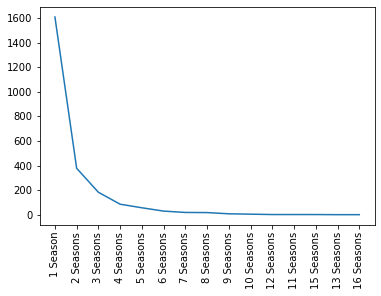

In [36]:
plt.plot(all_tv_shows.duration.value_counts().index.to_list()[:20], all_tv_shows.duration.value_counts()[:20])
plt.xticks(rotation = '90')

### Most of TV Shows have only 1 season according to the given data

## Explore the most common rating on Netflix

In [37]:
rating_sql = "SELECT rating, counter FROM (SELECT rating, COUNT(*) as counter FROM netflix_data GROUP BY rating) as types ORDER BY counter DESC"
rating = ps.sqldf(rating_sql)
rating

,rating,counter
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

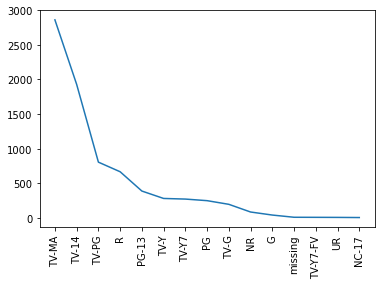

In [39]:
plt.plot(rating.rating, rating.counter)
plt.xticks(rotation = '90')

### Based on the graph above, TV-MA has the most common rating

# Summary

## Taking everything into consideration, based on the data processsing and operations some of the vital information was retrieved.
### The following data obtained:
<ul>
    <li> Show Types </li>
    <li> Popular Directors </li>
    <li> Popular Cast Members </li>
    <li> Popular Country </li>
    <li> Number of Shows Produced by Year </li>
    <li> Popular Tag </li>
    <li> Common Show Frequencies </li>
    <li> Common Rating </li>
</ul>